# CapStone Project


## Analysis of Neighborhoods of Bangalore for most favoured Cuisines

## Introduction

Hi there. I would like to give a brief introdcution about what this analysis is about and the Business Problem that is going to be addressed.

In modern times, due to the advances in communication, people all around the world have become one big family. Exchanging of information has led to the discovery of each other's culture and also attracted new folks. At present scenario, we have all major cities having people from diverse cultures living. This is an opurtunity for businesses as each group of people have their own preference based on their culture. For this assignment, lets focus on the city of <b>Bangalore</b>.

Especially, when it comes to food, we now have different cusines available based on the preference of customers. But the problem now is we have a lot of competition built up as well. Not having a good start might have unexpected results and may also lead to failure.

Hence, proper analysis must be done before opening a Restraunt of a particular cusine and also choosing the right location is crucial for success.

## Background Discussion

<p>
When thinking of starting a new business, it is important to analyze the market we are stepping into so the business strategies can be fine tuned for best results.<br />
Considering Bangalore, <b>the Silicon Valley of India</b> we have people settled there from many cultures and regions.<br/>
From this itself we can infer that we would have a wide range of tastes. But then, when entering into the world of Restraunts, its important to find the pulse of people. Knowing which cusines are prefered by majority can help business <b>Pivot</b> accordingly to need while maintaining good results. <br/>

Even though we have diverse people residing in Bangalore, it is important to note that the city is still adapting to different cusines. We have foodies who prefer western cusines while some prefer traditional. 
    
Opening a multi-cusine may attract a lot of folks but if deciding to open a restraunt of specific cusine, a lot of factors must be considered.
</p>

## Description of the Data

This analysis is structured this way:

We would first acquire data about the tastes of "Bangaloreans". This is acquired from the below link:
https://www.kaggle.com/ngokulakannan/zomato-india-restaurants2-lakh-restaurants-data

Its a Kaggle Dataset which has the data about Restraunts and their details such as Rating, Cost for Two and so on from each city within India.

Then we would filter out data related to Bangalore to find the most rated restraunts and their cusines.
This would give us an insight on the most favoured cusines.

Then, using <b>Foursquare API</b>, we can get details about each venue in the neighborhoods of Bangalore.
Finally, with the acquired data, we can perform analysis and can have insights on the locations where our chosen cusine can be favoured.

#### Target Audience

The Target audience for this Analysis would be as follows:

<ul>
    <li>Entrepreneurs who would like to pursue Restraunt business in Bangalore</li>
    <li>ANalytics Seekers who would like to expand their business within Bangalore</li>
    <li>Peope interested in current Trends and Analytics teams</li>
</ul>
        

The data we will be using is from the below dataset:
     
     https://www.kaggle.com/ngokulakannan/zomato-india-restaurants2-lakh-restaurants-data

    
### Sample Data

|city|area|rating|rating_count|cusine|cost_for_two|address|online_order|table_reservation|delivery_only|famous_food|longitude|latitude|
|----|----|------|------------|------|------------|-------|------------|-----------------|-------------|-----------|---------|--------|
|Agra|Civil Lines|4.1|409|North Indian|250|Delhi Gate, Raja Mandi Station Road, Civil Lines, Agra|TRUE|FALSE|FALSE|Dal Makhani , Shahi Paneer , Kadhai Paneer , Kadai Paneer|77.99853019|27.19619778|
|Agra|Shahganj|4.2|344|North Indian, South Indian|500|110, Jaipur House Market, Opposite, Commercial Tax Office, Jaipur House Colony, lohmandi, Agra|TRUE|FALSE|FALSE|Kadai Paneer , Panneer Butter Masala , Shahi Paneer , Kadhai Paneer , Dal Makhani|77.9866675|27.188102|
    
    
#### The dataset has data about all the restraunts and their details such as:
    
<ul>
        <li>name</li>
        <li>city</li>
        <li>rating</li>
        <li>cusine</li>
        <li>cost_for_two</li>
        <li>longitude</li>
        <li>latitude</li>   
    </ul>
These details can help us understand better about the top cuisines people prefer in Bangalore.

Now, after downloading the dataset and importing the required file, we then filter out the city to Bangalore which would then give us data about the restraunts of Bangalore.


Then, using Foursquare API, we can get details about each venue in the neighborhoods of Bangalore. Finally, with the acquired data, we can perform analysis and can have insights on the locations where our chosen cusine can be favoured.

In [1]:
# Importing essential Libraries

# Libraries for clustering
from sklearn.cluster import KMeans

# Libraries for Numeric Computation
import pandas as pd
import numpy as np
import math

# Libraries for Web Requests
import requests
from pandas import json_normalize

# Libraries for Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import folium
import geocoder

In [2]:
# Loading the data into a Data Frame
indian_restraunts = pd.read_csv('indian_restaurants_details_cleaned_data.csv')
indian_restraunts.head()


,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,timings,online_order,table_reservation,delivery_only,famous_food,longitude,latitude
0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21.0,011 22486474 +91 9717806814,North Indian,300.0,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN,77.284871,28.617732
1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51.0,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500.0,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta,73.184287,19.205887
2,https://www.zomato.com/ncr/brij-palace-restaur...,Brij Palace Restaurant,Delhi NCR,Jasola,NaN,NaN,+91 9891828106,North Indian,250.0,"4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",False,False,False,"Chana Masala , Butter Naan , Paneer Bhujia , D...",77.291223,28.563034
3,https://www.zomato.com/ncr/sahib-hotel-paharga...,Sahib Hotel,Delhi NCR,Paharganj,NaN,NaN,+91 9670005455,North Indian,300.0,"121, Amrit Kaur Market, Opposite New Delhi Rai...","{'Mon': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1...",False,False,False,NaN,77.218298,28.642411
4,https://www.zomato.com/kolkata/chunkys-shibpur...,Chunky's,Kolkata,Shibpur,3.0,78.0,+91 8442828284,"Italian, Pizza, Continental",500.0,"523, G.T Road, Howrah., Shibpur, Howrah","{'Mon': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",True,False,False,NaN,88.330708,22.577758


In [3]:
# Filering Out Data for Bangalore

bangalore = indian_restraunts[indian_restraunts['city'] == 'Bengaluru']

bangalore.reset_index(drop=True, inplace=True)
bangalore.head()



print("There are {} entries regarding Bangalore.".format(bangalore.shape[0]))

There are 20283 entries regarding Bangalore.


In [4]:
# Choosing relavant Columns and extracting Data

extracted=bangalore[["city","name","area","rating","cusine","cost_for_two","famous_food","longitude","latitude"]]
extracted.head()


,city,name,area,rating,cusine,cost_for_two,famous_food,longitude,latitude
0,Bengaluru,China Garten,Domlur,NaN,Chinese,400.0,NaN,77.639977,12.965844
1,Bengaluru,Cafe Kaara,Ulsoor,4.3,"Cafe, Salad, Desserts, Pizza",750.0,"Coffee , Hot Chocolate , Pasta , Risotto , Tir...",77.617962,12.975299
2,Bengaluru,Hyderabad Biryani House,Malleshwaram,4.2,"Biryani, Hyderabadi, Chinese",800.0,"Hyderabadi Biryani , Mutton Biryani , Chicken ...",77.571417,12.994095
3,Bengaluru,The Coffee Bean & Tea Leaf,MG Road,4.0,Cafe,700.0,"Coffee , Sandwich , Blueberry Muffin , Cappucc...",77.620303,12.973778
4,Bengaluru,Fly Dining,Nagawara,3.8,"Continental, North Indian",14000.0,"Pasta , Bruschettas",77.610328,13.047513


In [5]:
# Removing restraunts whose ratings are 0

extracted = extracted[extracted['rating'] !=0.0]
extracted.shape

(20283, 9)

#### Having a look at Cuisines

In [6]:
extracted['cusine']

#Cleaning the cuisines and removing multiple data
extracted['cusine'] = extracted['cusine'].str.split(',', expand=True)

extracted.head()

,city,name,area,rating,cusine,cost_for_two,famous_food,longitude,latitude
0,Bengaluru,China Garten,Domlur,NaN,Chinese,400.0,NaN,77.639977,12.965844
1,Bengaluru,Cafe Kaara,Ulsoor,4.3,Cafe,750.0,"Coffee , Hot Chocolate , Pasta , Risotto , Tir...",77.617962,12.975299
2,Bengaluru,Hyderabad Biryani House,Malleshwaram,4.2,Biryani,800.0,"Hyderabadi Biryani , Mutton Biryani , Chicken ...",77.571417,12.994095
3,Bengaluru,The Coffee Bean & Tea Leaf,MG Road,4.0,Cafe,700.0,"Coffee , Sandwich , Blueberry Muffin , Cappucc...",77.620303,12.973778
4,Bengaluru,Fly Dining,Nagawara,3.8,Continental,14000.0,"Pasta , Bruschettas",77.610328,13.047513


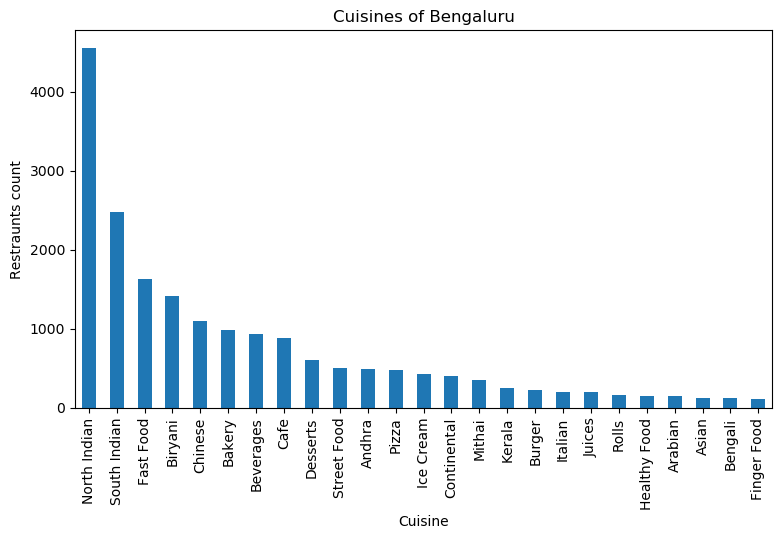

In [7]:
#Plotting the mostly available cuisines of Bangalore

plt.figure(figsize=(9,5), dpi = 100)
plt.title('Cuisines of Bengaluru')

extracted['cusine'].value_counts().nlargest(25).plot(kind='bar')

plt.xlabel('Cuisine')
plt.ylabel('Restraunts count')

plt.savefig('bangalore_cusines.png')

### Interpretation

From the above bar chart, we can see that the top 5 most favoured cuisines in Bangalore are:
<ul>
    <li>North Indian</li>
    <li>South Indian</li>
    <li>Fast Food</li>
    <li>Biryani</li>
    <li>Chineese</li>
</ul>

While cuisines of the country dominate the list, we can Fast Food in 3rd place and Chineese in 5th. If we look at other foods such as Pizza, Italian, Desserts, etc.. the count of restruants offering these cuisines is relatively lesser and are below Thousand.

From this we can infer that Bengaluru still is adapting to these cuisines and can thus provide ample opurtunities for these cuisines.

Hence, lets further explore the below cuisines:

<ul>
    <li>Italian</li>
    <li>Ice cream</li>
    <li>Burger</li>
    <li>Bakery</li>
    <li>Continental</li>
</ul>

### Exporing Italian

In [8]:
# Lets look at Italian

italian = extracted[extracted['cusine']=='Italian']
italian = italian.sort_values(['rating','cost_for_two'], ascending=[False,False])
italian.head()

,city,name,area,rating,cusine,cost_for_two,famous_food,longitude,latitude
8810,Bengaluru,Chianti,Indiranagar,4.7,Italian,2000.0,"Pasta , Pizza , Tiramisu , Wine , Bruschettas ...",77.640305,12.970218
13837,Bengaluru,Chianti,Koramangala 5th Block,4.7,Italian,2000.0,"Pasta , Pizza , Tiramisu , Wine , Bruschettas ...",77.621948,12.933453
8626,Bengaluru,The Pizza Bakery,Indiranagar,4.7,Italian,1200.0,"Beer , Tiramisu , Stuffed Garlic Bread , Pasta...",77.644672,12.970330
9349,Bengaluru,Bologna,Indiranagar,4.6,Italian,1600.0,"Tiramisu , Pasta , Pizza , Ravioli , Wine , Br...",77.641103,12.971822
8487,Bengaluru,Pasta Street,Indiranagar,4.6,Italian,1500.0,"Pasta , Pizza , Ravioli , Mocktails , Virgin M...",77.641579,12.967188


In [9]:
italian_rating_avg = round(italian['rating'].mean(), 2)
italian_cft_avg = round(italian['cost_for_two'].mean(), 2)

### Exploring Ice Cream

In [10]:
# Lets look at Ice Cream

icecream = extracted[extracted['cusine']=='Ice Cream']
icecream = icecream.sort_values(['rating','cost_for_two'], ascending=[False,False])
icecream.head()

,city,name,area,rating,cusine,cost_for_two,famous_food,longitude,latitude
8838,Bengaluru,Milano Ice Cream,Indiranagar,4.9,Ice Cream,400.0,"Truffle , Tiramisu , Apple Pie , Carrot Cake ,...",77.644039,12.979121
16459,Bengaluru,Corner House Ice Cream,Koramangala 5th Block,4.7,Ice Cream,350.0,"Death By Chocolate , Apple Crumble , Brownie C...",77.619799,12.933721
8046,Bengaluru,Corner House Ice Cream,Indiranagar,4.6,Ice Cream,350.0,"Death By Chocolate , Hot Chocolate Fudge , Bro...",77.637614,12.970218
16494,Bengaluru,Corner House Ice Cream,HSR,4.6,Ice Cream,350.0,"Death By Chocolate , Hot Chocolate Fudge , Van...",77.634982,12.911170
8760,Bengaluru,Natural Ice Cream,Indiranagar,4.6,Ice Cream,200.0,"Mango Ice Cream , Waffle Cone , Coffee Walnut ...",77.644498,12.970303


In [11]:
icecream_rating_avg = round(icecream['rating'].mean(), 2)
icecream_cft_avg = round(icecream['cost_for_two'].mean(), 2)

print('Average Rating of Ice Cream Cuisine is {} and Average Cost for Two is {}'.format(icecream_rating_avg, icecream_cft_avg))

Average Rating of Ice Cream Cuisine is 3.74 and Average Cost for Two is 254.3


### Exploring Burger

In [12]:
# Lets look at Burger

burger = extracted[extracted['cusine']=='Burger']
burger = burger.sort_values(['rating','cost_for_two'], ascending=[False,False])
burger.head()

burger_rating_avg = round(burger['rating'].mean(), 2)
burger_cft_avg = round(burger['cost_for_two'].mean(), 2)

print('Average Rating of burger Cuisine is {} and Average Cost for Two is {}'.format(burger_rating_avg, burger_cft_avg))

Average Rating of burger Cuisine is 3.67 and Average Cost for Two is 434.6


### Exploring Bakery

In [13]:
# Lets look at Bakery

bakery = extracted[extracted['cusine']=='Bakery']
bakery = bakery.sort_values(['rating','cost_for_two'], ascending=[False,False])
bakery.head()

bakery_rating_avg = round(bakery['rating'].mean(), 2)
bakery_cft_avg = round(bakery['cost_for_two'].mean(), 2)

print('Average Rating of burger Cuisine is {} and Average Cost for Two is {}'.format(bakery_rating_avg, bakery_cft_avg))

Average Rating of burger Cuisine is 3.56 and Average Cost for Two is 358.2


### Exploring Continental

In [14]:
# Lets look at Continental

continental = extracted[extracted['cusine']=='Continental']
continental = continental.sort_values(['rating','cost_for_two'], ascending=[False,False])
continental.head()

continental_rating_avg = round(continental['rating'].mean(), 2)
continental_cft_avg = round(continental['cost_for_two'].mean(), 2)

print('Average Rating of Continental Cuisine is {} and Average Cost for Two is {}'.format(continental_rating_avg, continental_cft_avg))

Average Rating of Continental Cuisine is 3.88 and Average Cost for Two is 1084.75


In [15]:
print('Average Rating of Italian Cuisine is {} and Average Cost for Two is {}'.format(italian_rating_avg, italian_cft_avg))
print('Average Rating of Ice Cream Cuisine is {} and Average Cost for Two is {}'.format(icecream_rating_avg, icecream_cft_avg))
print('Average Rating of Burger Cuisine is {} and Average Cost for Two is {}'.format(burger_rating_avg, burger_cft_avg))
print('Average Rating of Bakery Cuisine is {} and Average Cost for Two is {}'.format(bakery_rating_avg, bakery_cft_avg))
print('Average Rating of Continental Cuisine is {} and Average Cost for Two is {}'.format(continental_rating_avg, continental_cft_avg))

Average Rating of Italian Cuisine is 3.85 and Average Cost for Two is 914.43
Average Rating of Ice Cream Cuisine is 3.74 and Average Cost for Two is 254.3
Average Rating of Burger Cuisine is 3.67 and Average Cost for Two is 434.6
Average Rating of Bakery Cuisine is 3.56 and Average Cost for Two is 358.2
Average Rating of Continental Cuisine is 3.88 and Average Cost for Two is 1084.75


#### Comparing the above ratings and cost for two with the top 3

In [16]:
# North Indian

northindian = extracted[extracted['cusine']=='North Indian']
northindian = northindian.sort_values(['rating','cost_for_two'], ascending=[False,False])

northindian_rating_avg = round(northindian['rating'].mean(), 2)
northindian_cft_avg = round(northindian['cost_for_two'].mean(), 2)

# South Indian

southindian = extracted[extracted['cusine']=='South Indian']
southindian = southindian.sort_values(['rating','cost_for_two'], ascending=[False,False])

southindian_rating_avg = round(southindian['rating'].mean(), 2)
southindian_cft_avg = round(southindian['cost_for_two'].mean(), 2)

# Fast Food

fastfood = extracted[extracted['cusine']=='Fast Food']
fastfood = fastfood.sort_values(['rating','cost_for_two'], ascending=[False,False])

fastfood_rating_avg = round(fastfood['rating'].mean(), 2)
fastfood_cft_avg = round(fastfood['cost_for_two'].mean(), 2)

print('Average Rating of North Indian Cuisine is {} and Average Cost for Two is {}'.format(northindian_rating_avg, northindian_cft_avg))
print('Average Rating of South Indian Cuisine is {} and Average Cost for Two is {}'.format(southindian_rating_avg, southindian_cft_avg))
print('Average Rating of Fast Food Cuisine is {} and Average Cost for Two is {}'.format(fastfood_rating_avg, fastfood_cft_avg))

Average Rating of North Indian Cuisine is 3.54 and Average Cost for Two is 498.28
Average Rating of South Indian Cuisine is 3.57 and Average Cost for Two is 288.48
Average Rating of Fast Food Cuisine is 3.51 and Average Cost for Two is 289.53


In [17]:
print('Number of Restraunts for the Cuisines:')
print('North Indian: {}'.format(northindian.shape[0]))
print('South Indian: {}'.format(southindian.shape[0]))
print('Fast Food: {}'.format(fastfood.shape[0]))
print('Italian: {}'.format(italian.shape[0]))
print('Ice Cream: {}'.format(icecream.shape[0]))
print('Burger: {}'.format(burger.shape[0]))
print('Bakery: {}'.format(bakery.shape[0]))
print('Continental: {}'.format(continental.shape[0]))

Number of Restraunts for the Cuisines:
North Indian: 4550
South Indian: 2476
Fast Food: 1633
Italian: 201
Ice Cream: 429
Burger: 224
Bakery: 978
Continental: 396


### Comparision Table

|S.No|Cuisine|Average Rating|Average Cost for Two|Number of Restraunts|
|----|-------|--------------|--------------------|--------------------|
|1|North Indian|3.54|498.28|4550|
|2|South Indian|3.57|288.48|2476|
|3|Fast Food|3.51|289.53|1633|
|4|Italian|3.85|914.43|201|
|5|Ice Cream|3.74|254.3|429|
|6|Burger|3.67|434.6|224|
|7|Bakery|3.56|358.2|978|
|8|Continental|3.88|1084.75|396|


#### When Sorted based on Ratings from Highest to Lowest
|S.No|Cuisine|Average Rating|Average Cost for Two|Number of Restraunts|
|----|-------|--------------|--------------------|--------------------|
|8|Continental|3.88|1084.75|396|
|4|Italian|3.85|914.43|201|
|5|Ice Cream|3.74|254.3|429|
|6|Burger|3.67|434.6|224|
|2|South Indian|3.57|288.48|2476|
|7|Bakery|3.56|358.2|978|
|1|North Indian|3.54|498.28|4550|
|3|Fast Food|3.51|289.53|1633|

#### Interpration based on above Findings

On looking at the above data, we can say that the most preferable cuisines would be:

<ul>
    <li>Continental</li>
    <li>Italian</li>    
    <li>Ice Cream</li>    
    <li>Burger</li>
</ul>

But if we consider the <b>Cost for Two</b> Aspect, Continental and Italian may get the most ratings but is not budget friendly to customers. 

On looking at Ice Cream, it has a decent rating and a very low cost for two average which is budget friendly but may not be that profitable as there a lot of Restraunts giving competition.

Hence, the most preferable cuisines would be:

<ul>
    <li><b>Costly</b>: Italian</li>
    <li><b>Budget Friendly</b>: Burger</li>
</ul>

### Exploring Neighborhoods based on chosen Cuisines

In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    CLIENT_ID = 'YNFFXY301FYO5F1NIG35ZGXG05UPXNPFAMY4Y33IPWCHICOE' # your Foursquare ID
    CLIENT_SECRET = 'ZUUKCESAWGOJXQEHYMMRFB5Z1KR00RKPMADNUNHEELT1IPXR' # your Foursquare Secret
    VERSION = '20180604'
    LIMIT = 30
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        try:
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
            print(name)
        except:
            print(name + "- Exception")

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Grabbing Neighborhood Data from below url

https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore

In [52]:
bang_neighborhoods = pd.read_csv('bangalore_neighborhoods_cleaned.csv')

In [53]:
neighborhood_data = getNearbyVenues(bang_neighborhoods['Neighborhood'], bang_neighborhoods['Latitude'], bang_neighborhoods['Longitude'])

Cantonment area
Domlur
Indiranagar
Jeevanbheemanagar
Malleswaram
Sadashivanagar
Seshadripuram
Shivajinagar
Ulsoor
Vasanth Nagar
Bellandur
CV Raman Nagar
Hoodi
Krishnarajapuram
Mahadevapura
Marathahalli
Varthur
Whitefield
Banaswadi
HBR Layout
Horamavu
Kalyan Nagar
Kammanahalli
Lingarajapuram
Ramamurthy Nagar
Hebbal
Jalahalli
Mathikere
Peenya
R. T. Nagar
Vidyaranyapura
Yelahanka
Yeshwanthpur
Bommanahalli
Bommasandra
BTM Layout- Exception
Electronic City
HSR Layout
Koramangala
Banashankari
Basavanagudi
J. P. Nagar
Jayanagar
Kengeri
Nagarbhavi
Nayandahalli
Rajajinagar
Vijayanagar


In [54]:
# Gathering Venues from Foursquare API
neighborhood_data.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Banashankari,30,30,30,30,30,30
Banaswadi,30,30,30,30,30,30
Basavanagudi,30,30,30,30,30,30
Bellandur,30,30,30,30,30,30
Bommanahalli,30,30,30,30,30,30
Bommasandra,30,30,30,30,30,30
CV Raman Nagar,30,30,30,30,30,30
Cantonment area,30,30,30,30,30,30
Domlur,30,30,30,30,30,30


In [55]:
print('There are {} uniques categories.'.format(len(neighborhood_data['Venue Category'].unique())))

There are 118 uniques categories.


In [56]:
# one hot encoding
bang_onehot = pd.get_dummies(neighborhood_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bang_onehot['Neighborhood'] = neighborhood_data['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bang_onehot.columns[-1]] + list(bang_onehot.columns[:-1])
bang_onehot = bang_onehot[fixed_columns]

bang_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,...,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Tea Room,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
bang_onehot.shape

(1402, 118)

In [58]:
bang_grouped = bang_onehot.groupby('Neighborhood').mean().reset_index()
bang_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Asian Restaurant,BBQ Joint,...,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Tea Room,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant
0,Banashankari,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000
1,Banaswadi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
2,Basavanagudi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bellandur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bommanahalli,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Bommasandra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,CV Raman Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Cantonment area,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000
8,Domlur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Electronic City,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
num_top_venues = 5

for hood in bang_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bang_grouped[bang_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Banashankari----
               venue  freq
0  Indian Restaurant  0.17
1     Ice Cream Shop  0.13
2     Breakfast Spot  0.13
3        Snack Place  0.07
4               Café  0.07


----Banaswadi----
               venue  freq
0     Ice Cream Shop  0.17
1  Indian Restaurant  0.10
2                Pub  0.07
3         Steakhouse  0.07
4  Korean Restaurant  0.07


----Basavanagudi----
               venue  freq
0  Indian Restaurant  0.20
1     Ice Cream Shop  0.17
2     Breakfast Spot  0.07
3     Sandwich Place  0.07
4   Botanical Garden  0.03


----Bellandur----
               venue  freq
0     Ice Cream Shop  0.10
1  Indian Restaurant  0.07
2                Gym  0.07
3               Café  0.07
4                Pub  0.07


----Bommanahalli----
                venue  freq
0      Ice Cream Shop  0.10
1  Italian Restaurant  0.07
2      Clothing Store  0.07
3              Bakery  0.07
4        Burger Joint  0.07


----Bommasandra----
                  venue  freq
0  Fast Food Restaurant  

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bang_grouped['Neighborhood']

for ind in np.arange(bang_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bang_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Banashankari,Indian Restaurant,Breakfast Spot,Ice Cream Shop,Snack Place,Sandwich Place,Café,Bakery,Pizza Place,Coffee Shop,Performing Arts Venue
1,Banaswadi,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Pub,Steakhouse,Chinese Restaurant,Shopping Mall,Karnataka Restaurant,Café,Park
2,Basavanagudi,Indian Restaurant,Ice Cream Shop,Breakfast Spot,Sandwich Place,Botanical Garden,Pizza Place,Park,Boutique,Café,Restaurant
3,Bellandur,Ice Cream Shop,Coffee Shop,Café,Gym,Pub,Indian Restaurant,Sandwich Place,Lounge,Liquor Store,Mobile Phone Shop
4,Bommanahalli,Ice Cream Shop,Clothing Store,Bakery,Burger Joint,Italian Restaurant,Financial or Legal Service,Indie Movie Theater,Fast Food Restaurant,Breakfast Spot,Mobile Phone Shop


### Clustering Neighborhoods

In [61]:
# set number of clusters
kclusters = 4

bang_grouped_clustering = bang_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bang_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 3, 0, 2, 3, 3, 3, 2])

In [62]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bang_merged = bang_neighborhoods

# merge bang_merged with bangalore neighborhoods to add latitude/longitude for each neighborhood
bang_merged = bang_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bang_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,Cantonment area,12.993095,77.599609,3.0,Hotel,Indian Restaurant,Ice Cream Shop,Burger Joint,Park,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Department Store,Shopping Mall
1,Central,Domlur,12.961307,77.636822,3.0,Ice Cream Shop,Indian Restaurant,Boutique,Brewery,Hotel,Gaming Cafe,Department Store,Lounge,Chocolate Shop,Karnataka Restaurant
2,Central,Indiranagar,12.974611,77.640809,3.0,Ice Cream Shop,Café,Boutique,Hotel,Brewery,Breakfast Spot,Department Store,Lounge,Gaming Cafe,Chocolate Shop
3,Central,Jeevanbheemanagar,12.963277,77.659292,3.0,Ice Cream Shop,Indian Restaurant,Boutique,Burger Joint,Brewery,German Restaurant,Lounge,Multicuisine Indian Restaurant,Gaming Cafe,Chocolate Shop
4,Central,Malleswaram,13.005507,77.569201,0.0,Hotel,Indian Restaurant,Multiplex,Clothing Store,Bowling Alley,Ice Cream Shop,Bakery,Shopping Mall,Donut Shop,Italian Restaurant


### Visualising Clusters 

In [63]:
bang_merged['Cluster Labels'].unique()

array([ 3.,  0.,  1.,  2., nan])

In [64]:
bang_merged['Cluster Labels'] = bang_merged['Cluster Labels'].fillna(0)
bang_merged['Cluster Labels'] = bang_merged['Cluster Labels'].replace('inf',0)
bang_merged['Cluster Labels'] = bang_merged['Cluster Labels'].astype('int')

# create map

latitude = 12.972442
longitude = 77.580643

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = mplcm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bang_merged['Latitude'], bang_merged['Longitude'], bang_merged['Neighborhood'], bang_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Interpretation

Based on the above clustering, we can see that we have 5 Clusters. Lets look at each cluster to find out more.

#### Cluster 1

In [65]:
bang_merged.loc[bang_merged['Cluster Labels'] == 0, bang_merged.columns[[1] + list(range(5, bang_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Malleswaram,Hotel,Indian Restaurant,Multiplex,Clothing Store,Bowling Alley,Ice Cream Shop,Bakery,Shopping Mall,Donut Shop,Italian Restaurant
12,Hoodi,Ice Cream Shop,Shopping Mall,Office,Brewery,French Restaurant,Men's Store,Clothing Store,Creperie,Motorcycle Shop,Movie Theater
13,Krishnarajapuram,Shopping Mall,Brewery,Donut Shop,Office,Café,Multiplex,Clothing Store,Performing Arts Venue,Movie Theater,Men's Store
14,Mahadevapura,Bowling Alley,Donut Shop,Shopping Mall,Café,Indian Restaurant,Creperie,Motorcycle Shop,Movie Theater,Multiplex,Ice Cream Shop
24,Ramamurthy Nagar,Shopping Mall,Donut Shop,Café,Ice Cream Shop,French Restaurant,Office,Lounge,Pub,Italian Restaurant,Multiplex
26,Jalahalli,Hotel,Italian Restaurant,Bowling Alley,Clothing Store,Multiplex,Indian Restaurant,Seafood Restaurant,Lounge,Movie Theater,Department Store
27,Mathikere,Indian Restaurant,Italian Restaurant,Multiplex,Gym,Bowling Alley,Hotel,Ice Cream Shop,Clothing Store,Shopping Mall,Burger Joint
28,Peenya,Multiplex,Italian Restaurant,Clothing Store,Coffee Shop,Lounge,Bowling Alley,Indian Restaurant,Hotel,Electronics Store,Donut Shop
32,Yeshwanthpur,Italian Restaurant,Indian Restaurant,Multiplex,Hotel,Clothing Store,Lounge,Bowling Alley,Coffee Shop,Gym,Movie Theater
33,Bommanahalli,Ice Cream Shop,Clothing Store,Bakery,Burger Joint,Italian Restaurant,Financial or Legal Service,Indie Movie Theater,Fast Food Restaurant,Breakfast Spot,Mobile Phone Shop


#### Cluster 2

In [66]:
bang_merged.loc[bang_merged['Cluster Labels'] == 1, bang_merged.columns[[1] + list(range(5, bang_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Marathahalli,Indian Restaurant,Ice Cream Shop,Creperie,Gym,Office,Restaurant,History Museum,Motorcycle Shop,Movie Theater,Café
18,Banaswadi,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Pub,Steakhouse,Chinese Restaurant,Shopping Mall,Karnataka Restaurant,Café,Park
19,HBR Layout,Indian Restaurant,Ice Cream Shop,BBQ Joint,Coffee Shop,Korean Restaurant,Vegetarian / Vegan Restaurant,Bistro,Juice Bar,Park,Falafel Restaurant
20,Horamavu,Indian Restaurant,Ice Cream Shop,BBQ Joint,Coffee Shop,Steakhouse,Korean Restaurant,Shopping Mall,Chinese Restaurant,Burger Joint,Kerala Restaurant
21,Kalyan Nagar,Ice Cream Shop,Indian Restaurant,BBQ Joint,Coffee Shop,Korean Restaurant,Café,Fast Food Restaurant,Shopping Mall,Burger Joint,Falafel Restaurant
22,Kammanahalli,Ice Cream Shop,Indian Restaurant,BBQ Joint,Korean Restaurant,Café,Pub,Fast Food Restaurant,Shopping Mall,Burger Joint,Falafel Restaurant
23,Lingarajapuram,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Tea Room,Café,Pub,Chinese Restaurant,Seafood Restaurant,Department Store,Park
25,Hebbal,Indian Restaurant,Ice Cream Shop,Gym,Fast Food Restaurant,Snack Place,Resort,Bistro,Park,Burger Joint,Building
29,R. T. Nagar,Indian Restaurant,Ice Cream Shop,Hotel,Juice Bar,Tea Room,Snack Place,Fast Food Restaurant,Burger Joint,Italian Restaurant,Park
39,Banashankari,Indian Restaurant,Breakfast Spot,Ice Cream Shop,Snack Place,Sandwich Place,Café,Bakery,Pizza Place,Coffee Shop,Performing Arts Venue


#### Cluster 3

In [67]:
bang_merged.loc[bang_merged['Cluster Labels'] == 2, bang_merged.columns[[1] + list(range(5, bang_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Vidyaranyapura,Café,Indian Restaurant,Ice Cream Shop,Coffee Shop,Pizza Place,Italian Restaurant,Park,Flea Market,Bubble Tea Shop,Brewery
31,Yelahanka,Café,Indian Restaurant,Pizza Place,Ice Cream Shop,Bubble Tea Shop,Brewery,Fast Food Restaurant,Resort,Sandwich Place,Italian Restaurant
34,Bommasandra,Hotel,Café,Fast Food Restaurant,Pizza Place,Coffee Shop,Department Store,Asian Restaurant,Bar,Multicuisine Indian Restaurant,Breakfast Spot
36,Electronic City,Hotel,Café,Coffee Shop,Fast Food Restaurant,Department Store,Pizza Place,Asian Restaurant,Food Court,Food,Multicuisine Indian Restaurant
43,Kengeri,Café,Indian Restaurant,Pizza Place,Bakery,Coffee Shop,Restaurant,Bus Station,Lake,Department Store,Sporting Goods Shop
44,Nagarbhavi,Café,Indian Restaurant,Ice Cream Shop,Pizza Place,Bakery,Fast Food Restaurant,Multiplex,Asian Restaurant,Indian Chinese Restaurant,Coffee Shop


#### Cluster 4

In [68]:
bang_merged.loc[bang_merged['Cluster Labels'] == 3, bang_merged.columns[[1] + list(range(5, bang_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cantonment area,Hotel,Indian Restaurant,Ice Cream Shop,Burger Joint,Park,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Department Store,Shopping Mall
1,Domlur,Ice Cream Shop,Indian Restaurant,Boutique,Brewery,Hotel,Gaming Cafe,Department Store,Lounge,Chocolate Shop,Karnataka Restaurant
2,Indiranagar,Ice Cream Shop,Café,Boutique,Hotel,Brewery,Breakfast Spot,Department Store,Lounge,Gaming Cafe,Chocolate Shop
3,Jeevanbheemanagar,Ice Cream Shop,Indian Restaurant,Boutique,Burger Joint,Brewery,German Restaurant,Lounge,Multicuisine Indian Restaurant,Gaming Cafe,Chocolate Shop
5,Sadashivanagar,Indian Restaurant,Hotel,Ice Cream Shop,Multiplex,Snack Place,Pub,Park,Racetrack,Breakfast Spot,Bowling Alley
6,Seshadripuram,Indian Restaurant,Hotel,Ice Cream Shop,Lounge,Bakery,American Restaurant,Shopping Mall,Breakfast Spot,Racetrack,Park
7,Shivajinagar,Indian Restaurant,Burger Joint,Ice Cream Shop,Hotel,Lounge,Japanese Restaurant,Italian Restaurant,Plaza,Pub,Brewery
8,Ulsoor,Hotel,Ice Cream Shop,Café,Boutique,Brewery,Cocktail Bar,Pub,Plaza,Chocolate Shop,Gaming Cafe
9,Vasanth Nagar,Hotel,Indian Restaurant,Lounge,Burger Joint,Ice Cream Shop,Shopping Mall,Deli / Bodega,Park,Japanese Restaurant,Plaza
10,Bellandur,Ice Cream Shop,Coffee Shop,Café,Gym,Pub,Indian Restaurant,Sandwich Place,Lounge,Liquor Store,Mobile Phone Shop


### Results

Upon looking at each cluster, the top 5 Venues for each are as follows:

|S.No|Cluster|Burger Frequency|Italian Frequency|Neighborhoods|
|----|--------------|------------|------|---------|
|1|Cluster 1|Second and Furth Most Visited|First and Second Most Visited|Jalahalli, Mathikere, Peenya, Yeshwanthpur, Bommanahalli, BTM Layout, HSR Layout|
|2|Cluster 2|Eighth Most Visisted|Nineth Most Visited|Horamavu, Kalyan Nagar, Kammanahallil, Hebbal, R. T. Nagar, Nayandahalli|
|3|Cluster 3|Not frequently Visited|Eighth Most Visited|Vidyaranyapura, Yelahanka|
|4|Cluster 4|Fifth Most Visited|Eighth Most Visited|Cantonment area, Jeevanbheemanagar, Shivajinagar, Vasanth Nagar, Varthur|


Clearly, from the above findings, Neighborhoods present in Cluster 1 are more favourable as they have our Cuisines being most frequently ordered and the restaurants serving them are most frequently visited.

## Conclusion

### Most Suited Cuisines

#### The Most profitable Cuisines to serve in Bangalore are:
<ol>
    <li>Italian - Costly</li>
    <li>Burger - Budget Friendly</li>
</ol>

### Most suited Neighborhoods

#### The most suited Neighborhoods for Burger Cuisine are:
<ol>
    <li>HSR Layout</li>
    <li>Bommanahalli</li>
</ol>


#### The most suited Neighborhoods for Italian Cuisine are:
<ol>
    <li>Yeshwanthpur</li>
    <li>Jalahalli</li>
    <li>Mathikere</li>
    <li>Peenya</li>
</ol>




